## Estadística Aplicada

Sesión 6 - 25 agosto

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

# Repaso de MCO

In [2]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

In [25]:
#datos
datos = pd.read_excel('modelolineal.xlsx')

In [26]:
datos.head()

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21


In [27]:
datos = datos[['X', 'Y']]
datos.head()

,X,Y
0,23,19.246957
1,19,16.878501
2,27,20.187237
3,13,12.176789
4,21,21.420112


In [28]:
#estadisticas descriptivas
datos.describe()

,X,Y
count,30.000000,30.000000
mean,17.333333,19.038965
std,8.372094,5.689742
min,0.000000,6.808838
25%,12.250000,14.128834
50%,19.000000,19.937977
75%,23.000000,24.151130
max,29.000000,28.422786


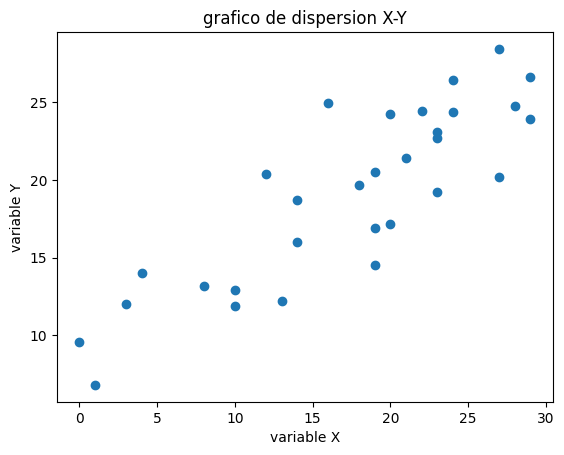

In [29]:
##grafico de dispersion
plt.scatter(datos['X'], datos['Y'])
plt.title('grafico de dispersion X-Y')
plt.xlabel('variable X')
plt.ylabel('variable Y')
plt.show()


el modelo muestra una relación lineal, por lo que tiene sentido estimar un modelo de mínimos cuadrados ordinarios

vamos a estimar $Y= \beta_0 + \beta_1X $

In [30]:
## 1 especifiar el modelo
reg0 = smf.ols(formula = 'Y~X', data = datos)
## 2 estimar el modelo
results0 = reg0.fit()
## 3 mostrar el modelo estimado
print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        16:13:43   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

Intercepto: p-value < alfa, rechazamos H0, significa qu el intercepto es distinito de cero, estadísticamente hablando es "estadísticamente significativo"

X: p-value < alfa, rechazamos h0, significa que "X" afecta a "Y"

En promedio cuando X aumenta 1, "Y" aumenta 0.58



MAD =Desviación Absoluta Media

MSD = Desviación Cuadrática Media

MAPE= Error Porentual Absoluto Medio

In [31]:
## primero obtener el valor pronosticado

datos['Y_hat'] = results0.predict(datos)
datos.head()

,X,Y,Y_hat
0,23,19.246957,22.333385
1,19,16.878501,20.007912
2,27,20.187237,24.658857
3,13,12.176789,16.519703
4,21,21.420112,21.170648


In [32]:
## calcular el MAD
MAD0 = abs(datos['Y']- datos['Y_hat']).mean()
print(f'El MAD del modelo es {MAD0.round(2)}')

El MAD del modelo es 2.35


vamos a evaluar $ Y = \beta_0 + \beta_1X + \beta_2 X^2$

In [33]:
## calcular la x cuadrada
datos['X2'] = datos['X']**2

In [34]:
#especificar el modelo
reg1 = smf.ols(formula= 'Y~X+X2', data = datos )
#estimar
results1 = reg1.fit()
#mostrar
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.92e-08
Time:                        16:13:43   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

In [35]:
datos['Y_hat1'] = results1.predict(datos)

In [36]:
MAD1 = (datos['Y'] - datos['Y_hat1']).abs().mean().round(3)

print(f'El MAD de los dos modelos modelo es {MAD0.round(3)} y {MAD1}')

El MAD de los dos modelos modelo es 2.354 y 2.355


el mejor modelo es el del menor valor del MAD, eso significa que el modelo $Y=\beta_0 + \beta_1X$ es el mejor modelo

# Validación cruzada

In [37]:
datos = pd.read_excel('modelolineal.xlsx')
datos = datos[['X', 'Y']]

In [38]:
datos['X2'] = datos['X']**2

In [39]:
datos.head()

,X,Y,X2
0,23,19.246957,529
1,19,16.878501,361
2,27,20.187237,729
3,13,12.176789,169
4,21,21.420112,441


In [40]:
##conjunto entrenamiento y conjunto de prueba
#entrenamiento
train_set = datos.iloc[:20]
#evaluacion
test_set = datos.iloc[20:]

In [41]:
##estimar conjunto de entrenamiento
#1
regm1 = smf.ols(formula = 'Y~X', data = train_set)
#2
resultsm1 = regm1.fit()

In [42]:
#pronosticar
test_set['Y-est1'] = resultsm1.predict(test_set)
test_set

C:\Users\DELL\AppData\Local\Temp\ipykernel_10912\544236821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y-est1'] = resultsm1.predict(test_set)


,X,Y,X2,Y-est1
20,0,9.544102,0,9.233587
21,20,24.230330,400,20.117395
22,24,26.417826,576,22.294157
23,23,23.066723,529,21.749966
24,8,13.145005,64,13.587110
25,24,24.385156,576,22.294157
26,10,12.934102,100,14.675491
27,4,14.002469,16,11.410349
28,29,26.599047,841,25.015109
29,10,11.910387,100,14.675491


In [43]:
from sklearn.metrics import mean_absolute_error as MAD

In [44]:
MADm1 = MAD(test_set['Y'], test_set['Y-est1'])
print(MADm1)

2.107953156470991


modelo $Y = \beta_0 + \beta_1X + \beta_2 X^2$

In [45]:
#1
regm2 = smf.ols(formula = 'Y~X+X2', data = train_set)
#2
resultsm2 = regm2.fit()

In [46]:
test_set['Y-est2'] = resultsm2.predict(test_set)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10912\3769875996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y-est2'] = resultsm2.predict(test_set)


In [47]:
#mad
MADm2 = MAD(test_set['Y'], test_set['Y-est2'])
print(MADm2)

2.334061668653748


In [48]:
print('Validacion cruzada', MADm1, MADm2)

Validacion cruzada 2.107953156470991 2.334061668653748


In [49]:
print(MAD0, MAD1)

2.3543034803789946 2.355
